In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('diabetes_dataset.csv') #read the csv data 
print(data.info) #print about the daat frame
data.columns #show daat columns 

<bound method DataFrame.info of        age  gender ethnicity education_level  income_level employment_status  \
0       58    Male     Asian      Highschool  Lower-Middle          Employed   
1       48  Female     White      Highschool        Middle          Employed   
2       60    Male  Hispanic      Highschool        Middle        Unemployed   
3       74  Female     Black      Highschool           Low           Retired   
4       46    Male     White        Graduate        Middle           Retired   
...    ...     ...       ...             ...           ...               ...   
99995   46    Male     Other        Graduate  Upper-Middle        Unemployed   
99996   41  Female     White        Graduate        Middle          Employed   
99997   57  Female     Black       No formal  Upper-Middle          Employed   
99998   47  Female     Black      Highschool  Lower-Middle           Retired   
99999   52  Female     White    Postgraduate        Middle          Employed   

      s

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [ ]:
print('Missing values per column:')
print(data.isnull().sum()) #print the sum of missing values

# If there are missing values, drop or impute them
df_clean = data.dropna() 
print('After dropping missing values, shape:', df_clean.shape)


# Basic cleaning: strip whitespace from string columns
str_cols = df_clean.select_dtypes(include=['object']).columns
for col in str_cols:
    df_clean[col] = df_clean[col].str.strip()

df_clean.head()

Missing values per column:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasti

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [38]:
# Exploratory Data Analysis
print('Dataframe Info:')
df_clean.info()

print('\nSummary Statistics:')
df_clean.describe()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


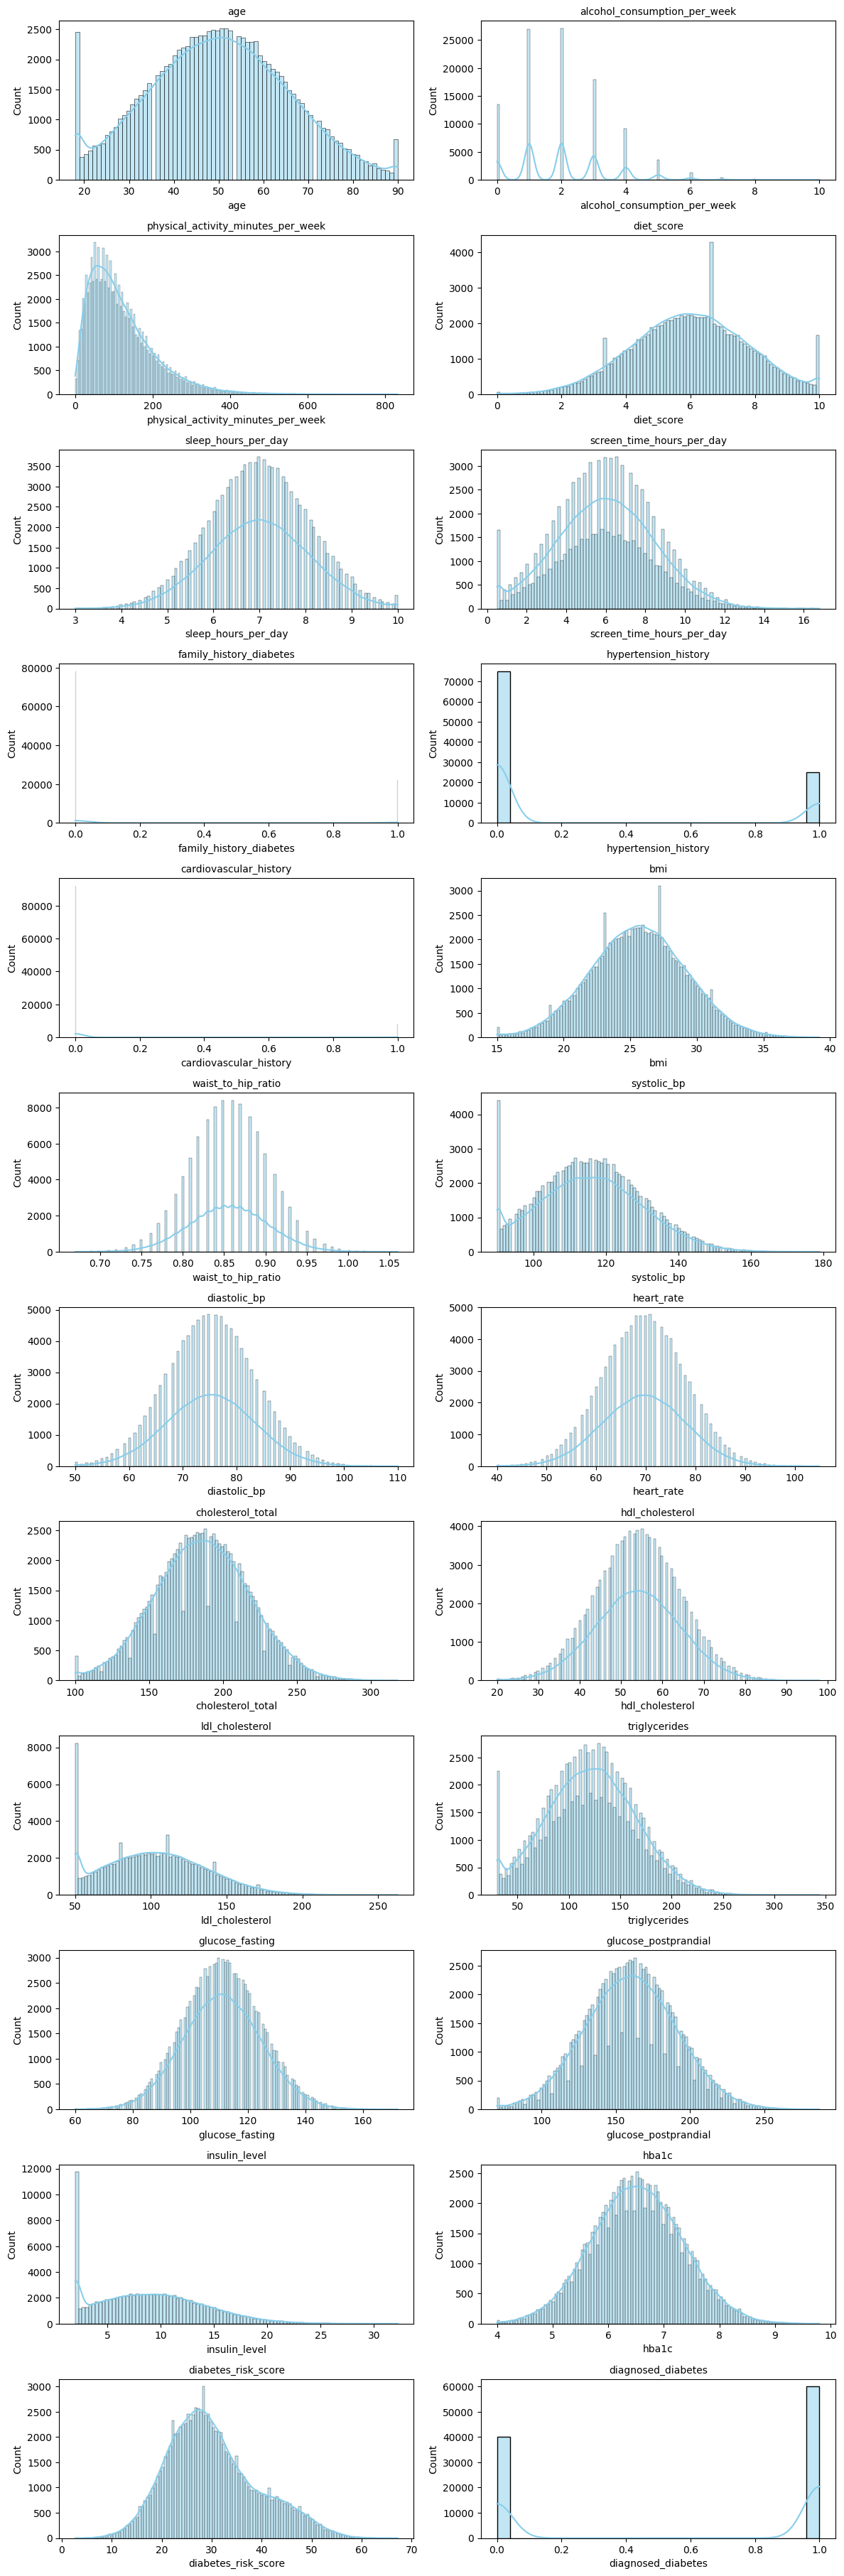

In [ ]:
import math

numeric_cols = data.select_dtypes(include='number') #only include columns that have numeric data that we can graph
num_plots = len(data.columns) #how many graphs will we plot = the length of how many cols
cols = 2 #reduced to 2 for better layout
rows = math.ceil(num_plots / cols) #calculate the amount of rows



plt.figure(figsize=(cols * 6, rows * 3)) #create the plot with rows and cols
for i, column in enumerate(numeric_cols, 1): #enumerate over all cols of data
    plt.subplot(rows, cols, i) #add the subplot
    sns.histplot(data[column], kde=True, color="skyblue") #plot the current col of data
    plt.title(column, fontsize=10) #add the title of the current col
plt.tight_layout() 
plt.show() #show graph

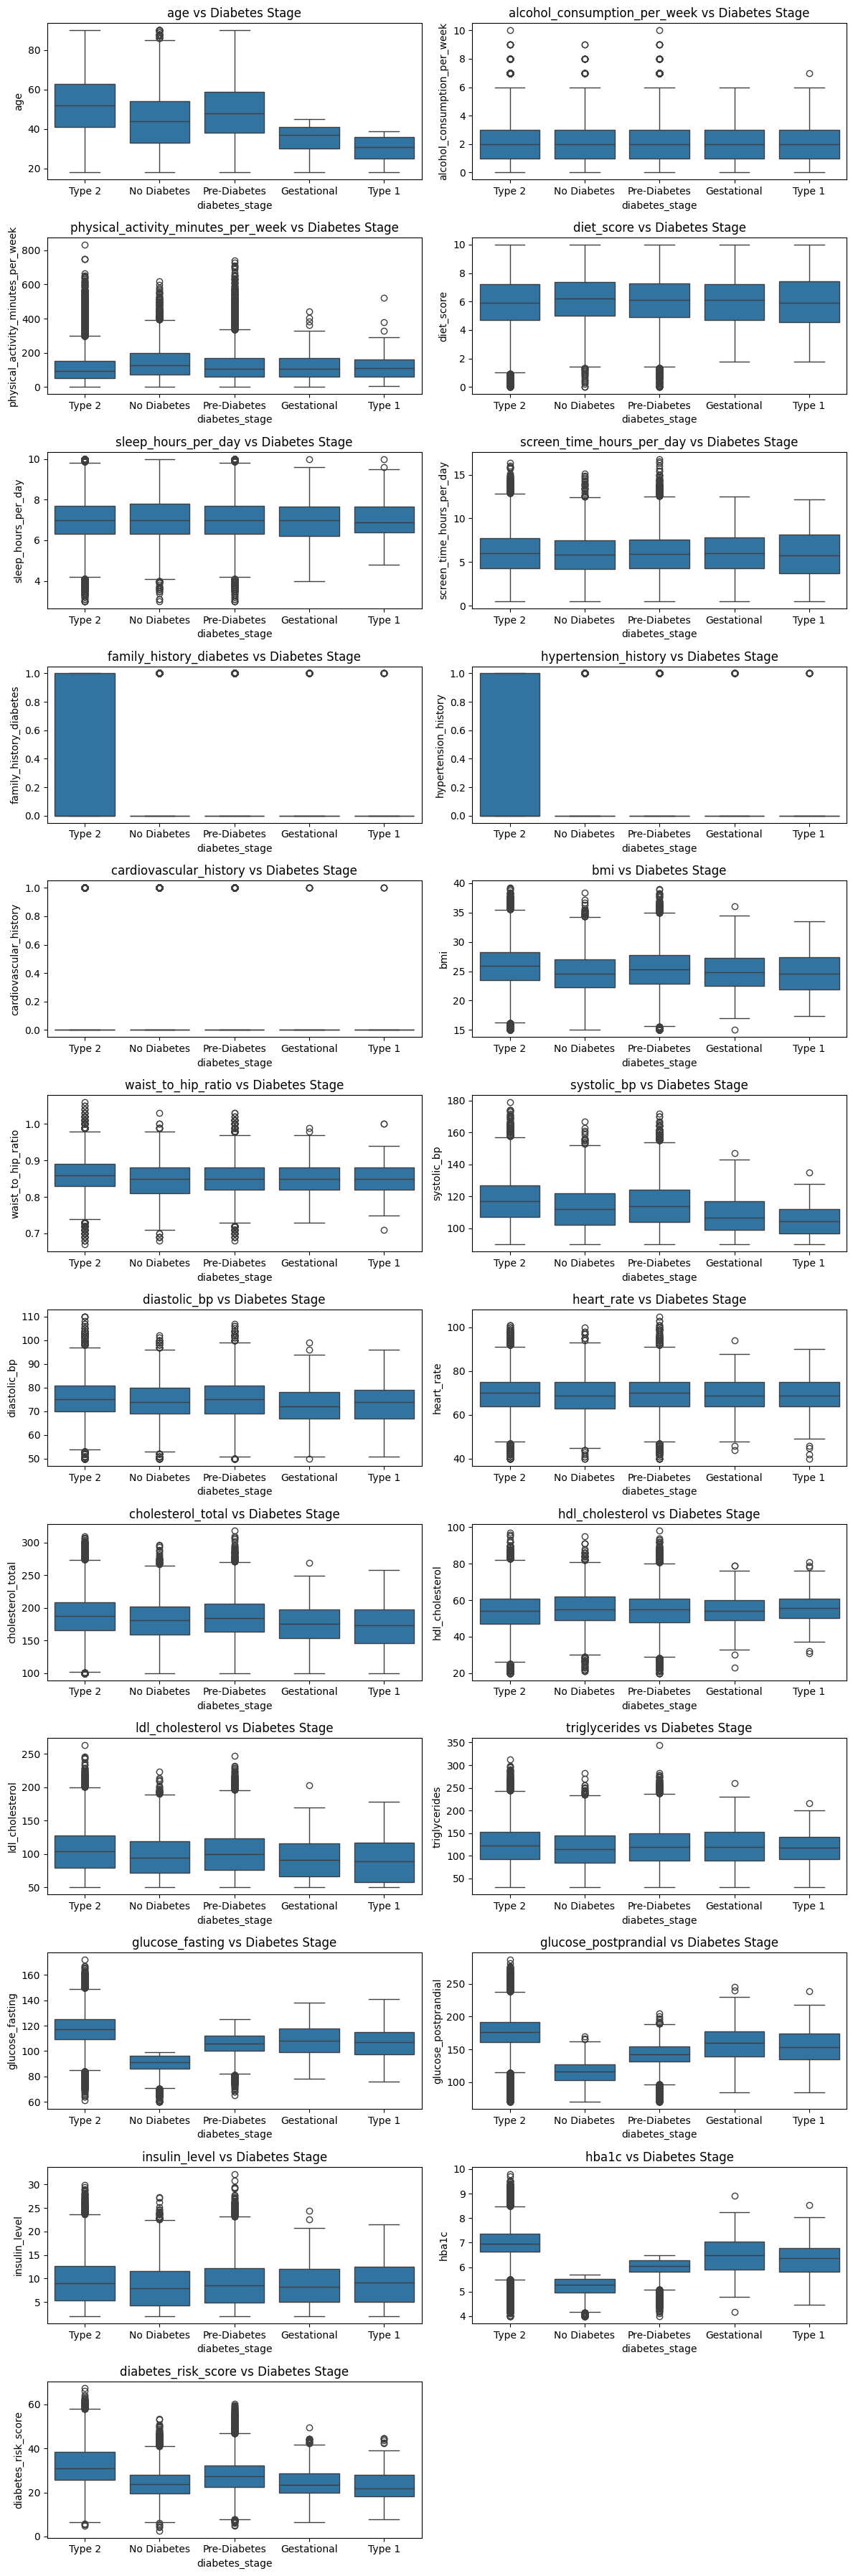

In [ ]:
#exclude target col
numeric_cols = data.select_dtypes(include='number').columns.drop(['diagnosed_diabetes'])

cols = 2 
rows = math.ceil(len(numeric_cols) / cols)

plt.figure(figsize=(cols * 6, rows * 3))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=data, x="diabetes_stage", y=column) #plot all cols vs the diabetes stage to show corelation 
    plt.title(f"{column} vs Diabetes Stage") #Add the title for each subplot

plt.tight_layout()
plt.show()




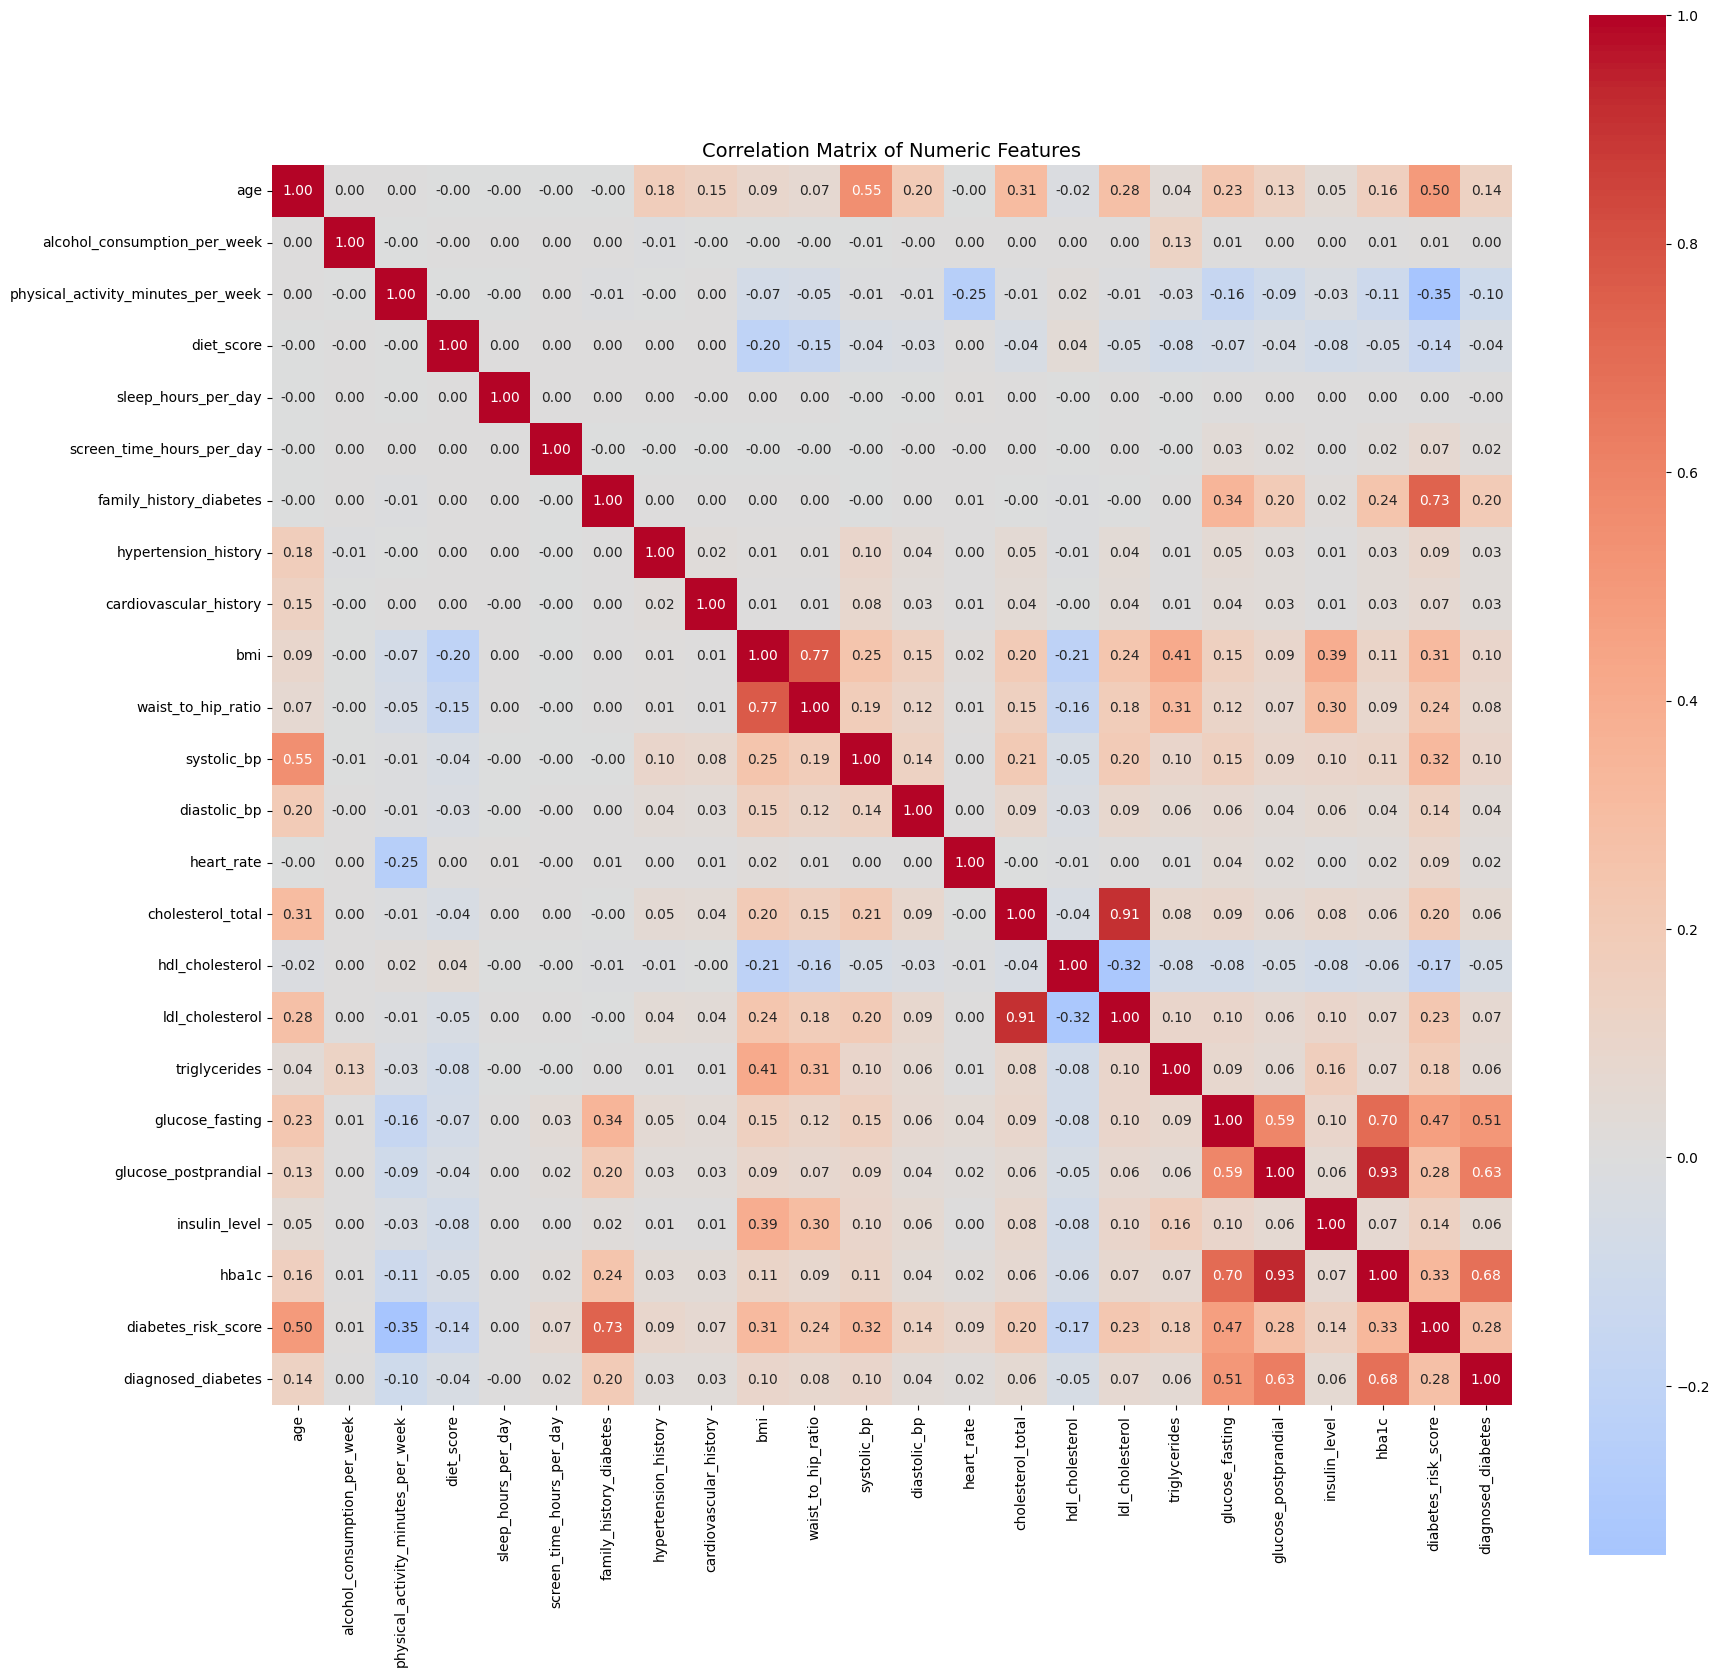

In [ ]:
corr = numeric_cols.corr() #create correlation matrix

plt.figure(figsize=(20, 20)) #plot correlation matrix
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    center=0,             
    square=True
)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

features = numeric_cols.drop('diagnosed_diabetes', axis=1)
target = numeric_cols['diagnosed_diabetes']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print('Prediction Accuracy:', acc)


Prediction Accuracy: 0.8597666666666667
